<a href="https://colab.research.google.com/github/harsh194/machine_learning/blob/main/Defect_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import os
new_directory = '/content/drive/MyDrive/Harsh/Machine Learning/Defect Detection/'
os.chdir(new_directory)

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [97]:
classes = os.listdir(new_directory + '/Train')
classes

['ok', 'ng']

In [98]:
print("Training Data : ")
for f in classes:
    path = new_directory + '/Train/' + f
    print(f"{f} - {len(os.listdir(path))}")

Training Data : 
ok - 400
ng - 400


In [99]:
print("Testing Data : ")
for f in classes:
    path = new_directory + '/Test/' + f
    print(f"{f} - {len(os.listdir(path))}")

Testing Data : 
ok - 400
ng - 400


In [100]:
from keras.preprocessing import image

In [ ]:
train_data = []
train_labels = []

for category in classes:
    folder = new_directory + '/Train/'+category
    for img_name in os.listdir(folder):
        img_path = f"{folder}/{img_name}"
        img = image.load_img(img_path, target_size= (150,80))
        img = image.img_to_array(img)
        train_data.append(img)
        train_labels.append(category)


In [158]:
train_data = np.array(train_data)
train_labels = np.array(train_labels)
train_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [148]:
train_data.shape

(800, 150, 80, 3)

In [149]:
train_labels.shape

(800,)

In [150]:
train_data = train_data.reshape(len(train_data), -1)
train_data.shape

(800, 36000)

In [157]:
category2label = {'ok':0,'ng':1}
label2category = {0:'ok',1:'ng'}
train_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [159]:
train_labels = np.array([category2label[label] for label in train_labels])

KeyError: ignored

In [160]:
train_labels.shape

(800,)

In [109]:
from keras.utils import to_categorical

In [110]:
train_labels = to_categorical(train_labels)

In [111]:
train_labels.shape

(800, 2)

In [112]:
train_labels[:2]

array([[1., 0.],
       [1., 0.]], dtype=float32)

In [113]:
from keras.layers import Dense
from keras import Sequential

In [114]:
features = train_data.shape[1]

In [115]:
features

36000

In [127]:
from tensorflow.keras.optimizers import Adam

In [128]:
model = Sequential()
model.add(Dense(units = 128, activation = 'relu', input_shape = (features,)))
#model.add(Dense(units = 512, activation = 'relu'))
#model.add(Dense(units = 256, activation = 'relu'))
#model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 2, activation = 'softmax'))

custom_optimizer = Adam(learning_rate = 0.0001)
model.compile(optimizer = custom_optimizer, loss = "categorical_crossentropy", metrics = ['accuracy'])
#model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ['accuracy'])

In [129]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 128)               4608128   
                                                                 
 dense_41 (Dense)            (None, 64)                8256      
                                                                 
 dense_42 (Dense)            (None, 32)                2080      
                                                                 
 dense_43 (Dense)            (None, 2)                 66        
                                                                 
Total params: 4618530 (17.62 MB)
Trainable params: 4618530 (17.62 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [131]:
model.fit(train_data, train_labels, batch_size = 32, epochs = 1000)

Epoch 1/1000
25/25 [==============================] - 1s 34ms/step - loss: 4.8340 - accuracy: 0.8725
Epoch 2/1000
25/25 [==============================] - 1s 31ms/step - loss: 3.9744 - accuracy: 0.8788
Epoch 3/1000
25/25 [==============================] - 1s 31ms/step - loss: 4.7311 - accuracy: 0.8775
Epoch 4/1000
25/25 [==============================] - 1s 33ms/step - loss: 1.5346 - accuracy: 0.9337
Epoch 5/1000
25/25 [==============================] - 1s 32ms/step - loss: 5.1965 - accuracy: 0.8625
Epoch 6/1000
25/25 [==============================] - 1s 32ms/step - loss: 11.0809 - accuracy: 0.8000
Epoch 7/1000
25/25 [==============================] - 1s 31ms/step - loss: 12.7902 - accuracy: 0.7688
Epoch 8/1000
25/25 [==============================] - 1s 31ms/step - loss: 13.2845 - accuracy: 0.7663
Epoch 9/1000
25/25 [==============================] - 1s 34ms/step - loss: 6.5661 - accuracy: 0.8562
Epoch 10/1000
25/25 [==============================] - 1s 41ms/step - loss: 2.1837 - acc

In [ ]:
test_data = []
test_labels = []

for category in classes:
    folder = new_directory + '/Test/'+category
    for img_name in os.listdir(folder):
        img_path = f"{folder}/{img_name}"
        img = image.load_img(img_path, target_size= (150,80))
        img = image.img_to_array(img)
        test_data.append(img)
        test_labels.append(category)

test_labels

In [162]:
test_data = np.array(test_data)
test_labels = np.array(test_labels)
test_labels.shape

(800,)

In [163]:
test_labels

array(['ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok',
       'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok',
       'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok',
       'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok',
       'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok',
       'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok',
       'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok',
       'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok',
       'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok',
       'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok',
       'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok',
       'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok',
       'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok',
       'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'o

In [164]:
test_labels = np.array([category2label[label] for label in test_labels])
test_labels = to_categorical(test_labels)
test_labels.shape

(800, 2)

In [165]:
test_data = test_data.reshape(len(test_data), -1)
test_data.shape

(800, 36000)

In [166]:
model.evaluate(test_data, test_labels)

25/25 [==============================] - 0s 9ms/step - loss: 0.2046 - accuracy: 0.9350


[0.20459255576133728, 0.9350000023841858]

In [167]:
pred = model.predict(test_data).argmax(axis=1)

25/25 [==============================] - 0s 8ms/step


In [168]:
pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [169]:
[label2category[p] for p in pred]

['ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ng',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ng',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ng',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ng',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ng',
 'ok',
 'ok',
 'ng',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ng',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ng',
 'ok',
 'ok',
 'ng',
 'ok',
 'ok',
 'ng',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ng',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',
 'ng',
 'ok',
 'ok',
 'ok',
 'ok',
 'ok',

In [178]:
def ok_ng(test_img):
    img = image.load_img(test_img, target_size= (150,80))
    img = image.img_to_array(img)
    plt.imshow(img.astype('int'))
    img = img.reshape(1,36000)
    pred = label2category[model.predict(img).argmax()]
    plt.title(pred)

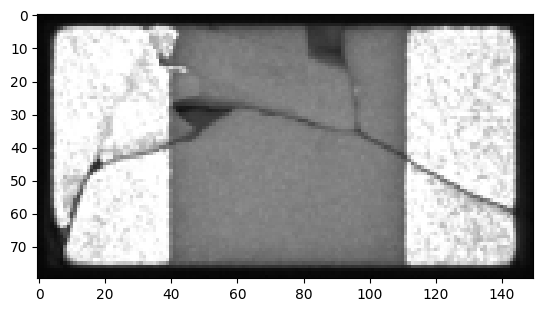

In [180]:
test_img = "/content/drive/MyDrive/Harsh/Machine Learning/Defect Detection/Test/ng/image_ng_h_1.pgm"
img = image.load_img(test_img, target_size= (150,80))
img = image.img_to_array(img)
plt.imshow(img.astype('int'))

In [175]:
img = img.reshape(1,36000)
img.shape

(1, 36000)

In [176]:
pred = label2category[model.predict(img).argmax()]
pred

1/1 [==============================] - 0s 58ms/step


'ng'

1/1 [==============================] - 0s 21ms/step


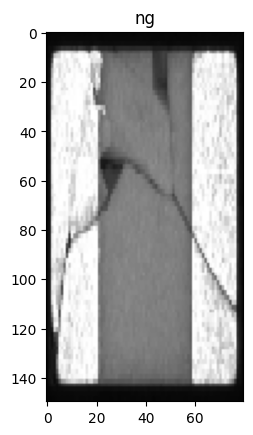

In [179]:
ok_ng(test_img)